<center><img src="https://github.com/DACSS-Spatial/data_forSpatial/raw/main/logo.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/DACSS-Spatial/TheGeo-DataFrame/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# The Geo Dataframe

The geodataframe (GDF) is a data table (a dataframe or DF) where every row represents an spatial element (point, line, polygon). In Python, to work on DF (simple tables) you need external packages (**pandas**), and for GDF you also need an external package. We will use **geopandas**.

You have some maps in zipped files for this session:

1.   World countries, rivers, and cities.
2.   Brazil regions and municipalities.

You also have a data table (DF): Airports of Brazil.

## Getting ready for the session

Please create a _repo_ for this session on _GitHub_ (name it as you think convenient). Once you clone the repo to your local machine, put all those GDF and DF in the repo and them _push_ them to the GitHub cloud. You should follow this session using your own _urls_ (you will use your own, replacing mine).

Yoy MUST read your DFs or GDFs from GitHub.

## The First GDF

With the help of **geopandas** and GitHub, we will bring the world countries:

In [87]:
import geopandas as gpd

#linkGitSession='https://github.com/DACSS-Spatial/data_forSpatial/raw/refs/heads/main/'
linkGitSession = 'https://github.com/Spatial-Data-Analytics-DACSS-690D/files-for-sessions-colab/raw/refs/heads/main/'

linkCountries = 'WORLD/World_Countries.zip'

fullLinkCountries = linkGitSession + linkCountries
countries = gpd.read_file(fullLinkCountries)

If no error was shown, we have the GDF. Let's visit it:

In [88]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [89]:
# dimensions
countries.shape

(252, 2)

In [90]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [91]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [92]:
# data types in the GDF
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


In [93]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


Al the previous commands exist and work the same if you had a DF from pandas. But now we have a new column type: **geometry**, and we can have some extra functiond from _geopandas_:

In [94]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

<Axes: >

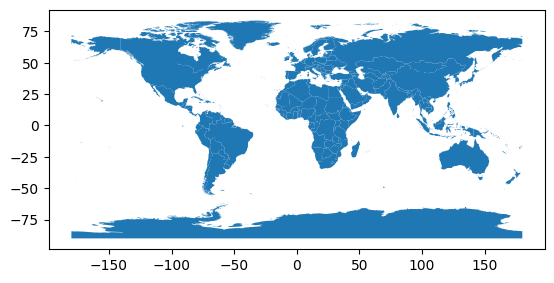

In [156]:
countries.plot()

As we have polygons, we know the map is about country borders:

<Axes: >

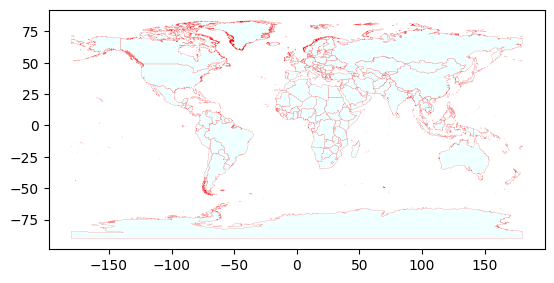

In [95]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of border
               linewidth=0.1) #thickness of lines

## More GDFs

Let's open the other maps:

In [96]:
linkRivers='WORLD/World_Hydrography.zip'
linkCities='WORLD/World_Cities.zip'

fullLinkRivers=linkGitSession+linkRivers
fullLinkCities=linkGitSession+linkCities


rivers=gpd.read_file(fullLinkRivers)
cities=gpd.read_file(fullLinkCities)

This is the rivers map:

<Axes: >

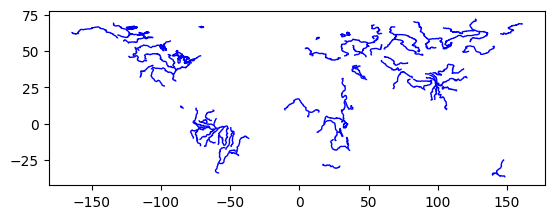

In [97]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='-')

This is the cities map:

<Axes: >

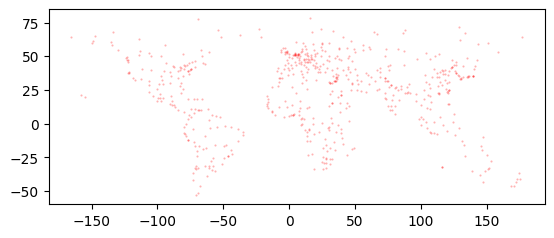

In [98]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

As we can see above, the rivers was a map of **lines**, while the cities were a map of **points**.

You can start by creating the **base** layer, and add other maps, as layers, on top:

<Axes: >

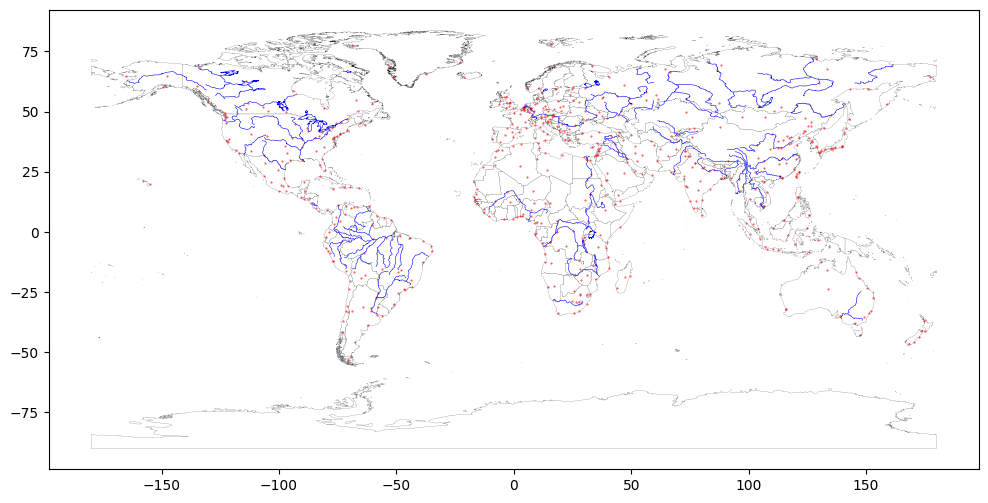

In [99]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...



# The Map Projection

We know the reality is at least in 3D, so on this screen and on piece of paper we should alter reality so the earth or parts of it can be seen in a meaningful way.

Let's find out about the way the maps we have are represented in 2D:

In [100]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [102]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In all the previous cases, you see a common CRS (EPSG 4326), and also that their axes are in **long** / **lat** (measured in *degrees*). That is a clear sign the the map is **NOT projected**.

At this point, let me keep one country:

In [103]:
brazil=countries[countries.COUNTRY=='Brazil']

The country (or the subset of the countries map) will inherit the original projection:

In [104]:
brazil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [105]:
# check units of measurement
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [106]:
# is this CRS projected?
brazil.crs.is_projected

False

The fact it is not projected, means that no operation involving distances gives reliable nor consistente results. For instance, we know Polygons have a centroid; but when we try getting a centroid from an **unprojected** polygon, you get:

In [107]:
# a warning from python!
brazil.centroid

/tmp/ipython-input-1383724398.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


,0
29,POINT (-53.09009 -10.77302)


/tmp/ipython-input-275019842.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid.plot(ax=base,color='red')


<Axes: >

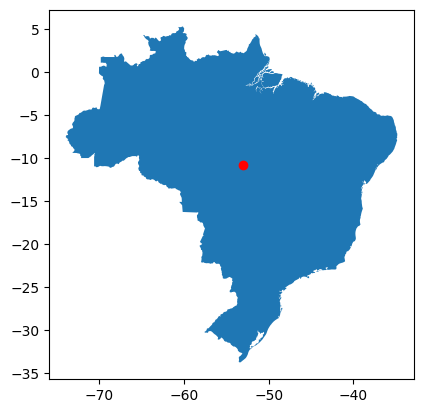

In [108]:
# this does not look bad
base=brazil.plot()
brazil.centroid.plot(ax=base,color='red')

## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a EPSG per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS), but also debating with AI is good alternative.

In [109]:
# recommended from website
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [110]:
# now this works with no warning
brazil.to_crs(5641).centroid

,0
29,POINT (3884486.179 8756856.093)


In [111]:
# recommended from Gemini - after a long chat!
brazil.to_crs(5880).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [112]:
# no warning either!
brazil.to_crs(5880).centroid

,0
29,POINT (5085264.134 8827720.201)


Let's plot!

/tmp/ipython-input-2717425573.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid.plot(color='red',ax=base5880)


<Axes: >

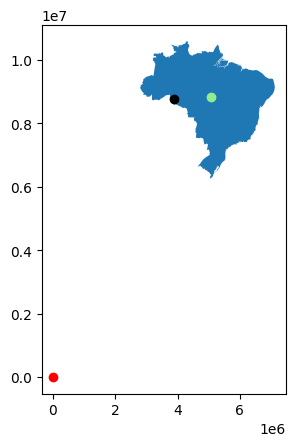

In [113]:
# replotting:

base5880=brazil.to_crs(5880).plot()
brazil.to_crs(5641).centroid.plot(color='black',ax=base5880)
brazil.to_crs(5880).centroid.plot(color='lightgreen',ax=base5880)
brazil.centroid.plot(color='red',ax=base5880)

Let's keep the **EPSG: 5880**  for the the country and cities:

In [114]:
brazil_5880=brazil.to_crs(5880)
cities_brazil_5880=cities[cities.COUNTRY=='Brazil'].to_crs(5880)

### Think about...
<div class="alert-success">

What would be a good CRS for your country, state, city?
    
</div>

## Creating a spatial dataframe

You have a CSV file with information on the airports in Brazil. Save it to GitHub and open it:

In [116]:
import pandas as pd #using pandas

infoairports=pd.read_csv(linkGitSession+'BRAZIL/br-airports.csv')

# take a look

infoairports #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
2,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
3,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
4,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.9105,-43.163101,11,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,345213,SD8M,heliport,Fazenda Alegria - H Heliport,-4.334444,-45.359167,135,SA,Brazil,BR,...,Vitorino Freire,0,SD8M,NaN,MA0116,NaN,NaN,NaN,0,2021-06-05T16:33:23+00:00
6668,309669,SSVR,closed,Volta Redonda Airport,-22.4978,-44.085,1245,SA,Brazil,BR,...,Volta Redonda,0,NaN,NaN,NaN,NaN,NaN,"SSVR, SSVR, QVR",0,2013-09-28T14:52:12+00:00
6669,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
6670,341727,BR-1429,heliport,Santa Helena Heliport,-23.59851,-47.441196,2254,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00


Notice the firt row must not stay in the data. Then,

In [117]:
# bye first row
infoairports.drop(index=0, #bye row 'zero'
                  inplace=True) #immediately

infoairports.reset_index(drop=True, # reset the index (row numbers)
                         inplace=True) # immediately
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
1,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
2,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
3,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.9105,-43.163101,11,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
4,5872,SBBR,large_airport,Presidente Juscelino Kubitschek International ...,-15.869167,-47.920834,3497,SA,Brazil,BR,...,Brasília,1,SBBR,BSB,DF0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...,NaN,51275,2020-08-24T11:15:12+00:00


This DF has so many columns:

In [118]:
infoairports.columns


Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [119]:
# keeping some

# list of names to keep
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']

infoairports=infoairports.loc[:,keep] # 'loc' when you have column names

# less columns.

infoairports.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6671 non-null   object
 1   type           6671 non-null   object
 2   latitude_deg   6671 non-null   object
 3   longitude_deg  6671 non-null   object
 4   elevation_ft   6500 non-null   object
 5   region_name    6671 non-null   object
 6   municipality   6647 non-null   object
dtypes: object(7)
memory usage: 364.9+ KB


We have two problems here:

*   A column name is **type**. You must not use that name in a pandas dataframe column. Optionally change 'name' to 'airport_name'.
*   Columns 2,3 and 4 are 'object', and they should be numeric. Then, we should use pandas' **pd.to_numeric()** function:

Solving problem 1:

In [120]:
infoairports.rename(columns={'type':'airport_type','name':'airport_name'},inplace=True)

Solving problem 2:

In [121]:
ColumnsToNumeric=['latitude_deg', 'longitude_deg','elevation_ft']

infoairports[ColumnsToNumeric]=infoairports.loc[:,ColumnsToNumeric].apply(lambda x:pd.to_numeric(x))

In [122]:
# RE verifying
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   airport_name   6671 non-null   object 
 1   airport_type   6671 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6671 non-null   object 
 6   municipality   6647 non-null   object 
dtypes: float64(3), object(4)
memory usage: 364.9+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

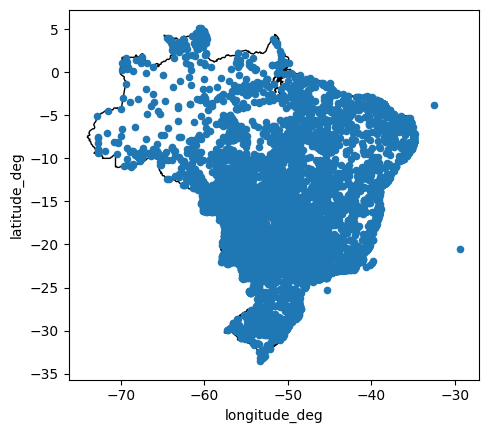

In [123]:
# let's plot using the unprojected map as base:

base = brazil.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

The plotting worked well, but this is a poor choice.

### Think about...
<div class="alert-success">

Why this would be wrong?
    
</div>

Let's use the projected BRAZIL:

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

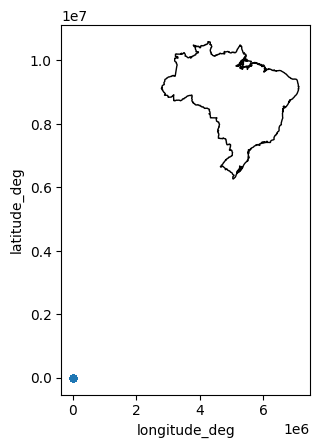

In [124]:
base = brazil_5880.plot(color='white', edgecolor='black')

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

That results only shows the different coordinate systems. But a bigger problem may be that the airports are not a spatial object:

In [125]:
type(infoairports)

pandas.core.frame.DataFrame

The job is to turn the DF info a GDF:

In [126]:
airports_gdf=gpd.GeoDataFrame(data=infoairports,
                          geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                                      infoairports.latitude_deg),
                          crs=brazil.crs.to_epsg())# the original coordinates were unprojected!


In [127]:
#verify:
type(airports_gdf)

geopandas.geodataframe.GeoDataFrame

Now that we have a GDF, we can reproject:

<Axes: >

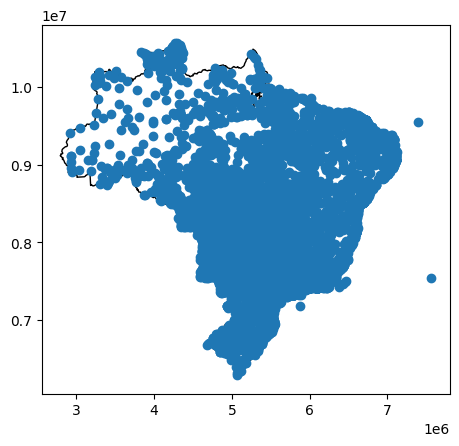

In [128]:
airports_gdf_5880=airports_gdf.to_crs(5880)

## then

base = brazil_5880.plot(color='white', edgecolor='black')
airports_gdf_5880.plot(ax=base)

<a class="anchor" id="11"></a>

## Formating Spatial objects into GeoDataFrames



You know **cities_brazil_5880** is a GDF:

In [129]:
type(cities_brazil_5880)

geopandas.geodataframe.GeoDataFrame

Is the brazil centroid a dataframe?

In [130]:
brazil_5880.centroid

,0
29,POINT (5085264.134 8827720.201)


In [131]:
type(brazil_5880.centroid)

geopandas.geoseries.GeoSeries

You are getting a **GeoSeries** (GS).

In case an operation in Geopandas required a GDF instead of a GS, you may need this code:

In [132]:
brazil_5880.centroid.to_frame()

,0
29,POINT (5085264.134 8827720.201)


We can give a better look to this GDF:

In [133]:
brazil_5880.centroid.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 29 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


Notice you get a very simple GDF, and you may want to add some information:

In [134]:
# conversion
centroids=brazil_5880.centroid.to_frame()

# new column (optional)
centroids['country']='Brazil'

# renaming the geometry column
centroids.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
centroids = centroids.set_geometry("geometry")

# verifying:
centroids.crs

<Projected CRS: EPSG:5880>
Name: SIRGAS 2000 / Brazil Polyconic
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore. Includes Rocas, Fernando de Noronha archipelago, Trindade, Ihlas Martim Vaz and Sao Pedro e Sao Paulo.
- bounds: (-74.01, -35.71, -25.28, 7.04)
Coordinate Operation:
- name: Brazil Polyconic
- method: American Polyconic
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [135]:
centroids

,geometry,country
29,POINT (5085264.134 8827720.201),Brazil


<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2) on Brazil to find some interesting facts:

In [136]:
brazil_states=gpd.read_file(linkGitSession+'BRAZIL/bra_admbnda_adm1_ibge_2020.zip')
brazil_municipalities=gpd.read_file(linkGitSession+'BRAZIL/bra_admbnda_adm2_ibge_2020.zip')

They are maps, for sure:

In [137]:
type(brazil_states), type(brazil_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

But, notice this:

In [138]:
brazil_states.crs, brazil_municipalities.crs

(None, None)

They do not have crs information, however they can be plotted:

<Axes: >

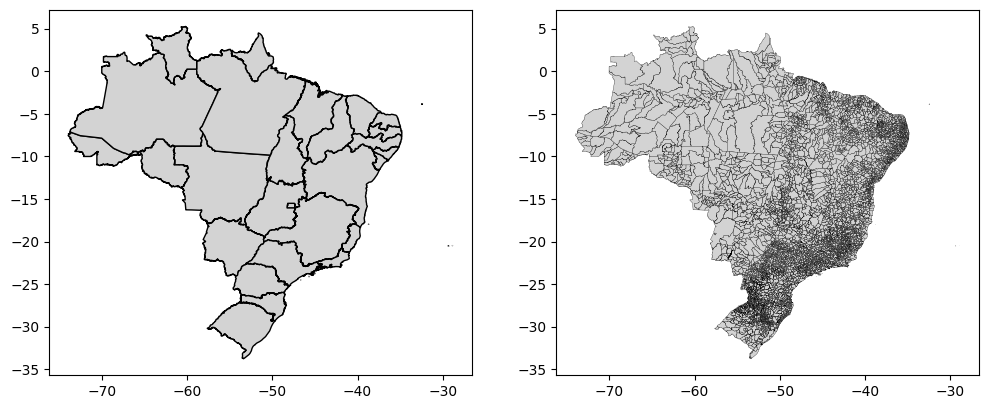

In [139]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


Since we are using the crs 5880 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [140]:
## uncomment this to see the error message
# brazil_states.to_crs(5880)

Python says _"Please set a crs on the object first"_. This would mean to know the original projection of the geometry:

From the plots above and the axes shown, we conclude the maps are unprojected, then:

In [141]:
# set as unprojected
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [142]:
brazil_states_5880=brazil_states.to_crs(5880)
brazil_municipalities_5880=brazil_municipalities.to_crs(5880)

# Saving

We will create a file readabel by R or Python, in this case a GeoPackage file (**.gpkg**). This file allows you to save all the previous maps as **layers** in **one** file.

In [143]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_5
_7
rivers
cities
brazil
brazil_5880
cities_brazil_5880
airports_gdf
airports_gdf_5880
_45
centroids
_48
brazil_states
brazil_municipalities
brazil_states_5880
brazil_municipalities_5880
_79
_81
_91
_93
_132
_135


We know we will save all the Brazil's 5880:
brazil_5880,cities_brazil_5880, airports_gdf_5880, brazil_states_5880, brazil_municipalities_5880.
...and also, from 'world': countries,rivers, and cities.

Let's check those column names are more intuitive:

In [144]:
brazil_5880.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [145]:
cities_brazil_5880.columns

Index(['NAME', 'COUNTRY', 'CAPITAL', 'geometry'], dtype='object')

In [146]:
airports_gdf_5880.columns

Index(['airport_name', 'airport_type', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'region_name', 'municipality', 'geometry'],
      dtype='object')

In [147]:
brazil_states_5880.columns

Index(['ADM0_EN', 'ADM0_PT', 'ADM0_PCODE', 'ADM1_PT', 'ADM1_PCODE',
       'geometry'],
      dtype='object')

In [148]:
brazil_municipalities_5880.columns

Index(['ADM0_EN', 'ADM0_PT', 'ADM0_PCODE', 'ADM1_PT', 'ADM1_PCODE', 'ADM2_PT',
       'ADM2_PCODE', 'ET_ID', 'geometry'],
      dtype='object')

Let's drop and rename some columns in the last three:

In [149]:
airports_gdf_5880.drop(columns=['latitude_deg', 'longitude_deg'],inplace=True)
airports_gdf_5880.rename(columns={'region_name':'region'},inplace=True)

brazil_states_5880.drop(columns=['ADM0_EN', 'ADM0_PT', 'ADM0_PCODE'],inplace=True)
brazil_states_5880.rename(columns={'ADM1_PT':'state_name','ADM1_PCODE':'state_code'},inplace=True)

brazil_municipalities_5880.drop(columns=['ADM0_EN', 'ADM0_PT', 'ADM0_PCODE','ET_ID'],inplace=True)
brazil_municipalities_5880.rename(columns={'ADM1_PT':'state_name','ADM1_PCODE':'state_code','ADM2_PT':"municipality_name",
       'ADM2_PCODE':"municipality_code"},inplace=True)


We choose what to save for later use (send it to GitHub):

In [150]:
### from the list above:
brazil_5880.to_file('brazil_5880.gpkg',driver='GPKG',layer='country')
cities_brazil_5880.to_file('brazil_5880.gpkg',driver='GPKG',layer='cities')
airports_gdf_5880.to_file('brazil_5880.gpkg',driver='GPKG',layer='airports')
brazil_states_5880.to_file('brazil_5880.gpkg',driver='GPKG',layer='states')
brazil_municipalities_5880.to_file('brazil_5880.gpkg',driver='GPKG',layer='municipalities')

Let's check the names of the other group:

In [151]:
rivers.columns

Index(['NAME', 'SYSTEM', 'geometry'], dtype='object')

In [152]:
cities.columns

Index(['NAME', 'COUNTRY', 'CAPITAL', 'geometry'], dtype='object')

In [153]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

Let's rename:

In [154]:
rivers.rename(columns={'NAME':'RIVER'},inplace=True)
cities.rename(columns={'NAME':'CITY'},inplace=True)

We may also create:

In [155]:
rivers.to_file('worldMaps.gpkg',driver='GPKG',layer='rivers')
cities.to_file('worldMaps.gpkg',driver='GPKG',layer='cities')
countries.to_file('worldMaps.gpkg',driver='GPKG',layer='countries')